In [14]:
import numpy as np
import pandas as pd
import os
import mvpa_base_functions as bf
import pickle
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

%matplotlib inline

In [15]:
from nilearn.input_data import NiftiLabelsMasker, NiftiMapsMasker, NiftiMasker
from nilearn.image import concat_imgs, load_img
import nibabel as nib

brain_file = './masks/whole_brain_mask_Sch7net400_subcortex_cerebellum_MNI152NLin2009cAsym_res-2space.nii.gz'
bimg = load_img(brain_file)
bdata = bimg.get_fdata().copy()
bdata[bdata>0] = 1
brain_img = nib.Nifti1Image(bdata, bimg.affine)

masker = NiftiMasker(brain_img, standardize=False)
val = masker.fit_transform(brain_file)

fearnet_file = './masks/fearNet_10regions_MNI152NLin2009cAsym_res-2_space.nii.gz'
fear_img = load_img(fearnet_file)


masker = NiftiMasker(brain_img, standardize=False)
voxel_reg_ids = masker.fit_transform(fear_img).reshape(-1)
fearnet_index = voxel_reg_ids != 0

In [16]:
D = pickle.load(open('./results/threat_circuit_predictive_patterns.pkl', 'rb'))
all_pred_patterns = D['all_pred_patterns']

itrl = 0 # select trial-block
coef_vals = all_pred_patterns[itrl].copy()
coef_vals = stats.zscore(coef_vals, axis=-1)
# coef_vals = np.nanmean(coef_vals, axis=0, keepdims=True)



vals = np.zeros((len(fearnet_index),))
vals[fearnet_index] = coef_vals.reshape((-1,))
img = masker.inverse_transform(vals)

In [17]:
from scipy.ndimage.interpolation import rotate
import scipy
from nilearn import image

vmin = -3
vmax = 3
fig_size = (5,5)

/tmp/ipykernel_342635/1567303704.py:1: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate


(37.25, 63.75, 32.25)


/tmp/ipykernel_342635/788830416.py:16: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  r = scipy.ndimage.filters.gaussian_filter(r, 1, mode='constant')
/tmp/ipykernel_342635/788830416.py:25: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  r1 = scipy.ndimage.filters.gaussian_filter(r1, 1, mode='constant')


(-0.5, 11.5, 12.5, -0.5)

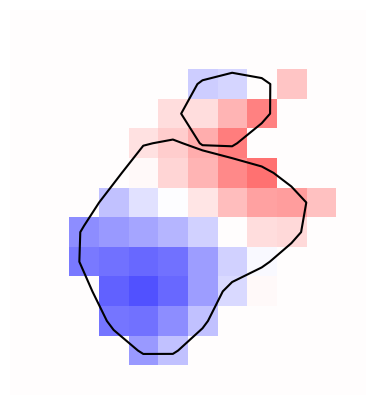

In [18]:
# amygdala slice
amyg_slice = [-22,-5,-14]
coord = image.coord_transform(amyg_slice[0], amyg_slice[1], amyg_slice[2], np.linalg.inv(img.affine))

print(coord)

d = img.get_fdata()[:,63][30:42][:,23:36].copy()
d = np.rot90(d)


r = fear_img.get_fdata()[:,63][30:42][:,23:36].copy()
r = np.rot90(r)
r[d==0] = 0
r[r!=1] = 0
r[r!=0] = 1
r = scipy.ndimage.filters.gaussian_filter(r, 1, mode='constant')



r1 = fear_img.get_fdata()[:,63][30:42][:,23:36].copy()
r1 = np.rot90(r1)
r1[d==0] = 0
r1[r1!=2] = 0
r1[r1!=0] = 1
r1 = scipy.ndimage.filters.gaussian_filter(r1, 1, mode='constant')

fig, ax = plt.subplots()
fig.set_size_inches(fig_size)
ax.imshow(r)
ax.contour(r, levels=[0.5], colors='k')
ax.contour(r1, levels=[0.5], colors='k')
ax.imshow(d, cmap='seismic', vmax=vmax, vmin=vmin)

plt.axis("off")

(30.25, 66.25, 39.25)


/tmp/ipykernel_342635/2772486629.py:14: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  r = scipy.ndimage.filters.gaussian_filter(r, 1, mode='constant')
/tmp/ipykernel_342635/2772486629.py:23: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  r1 = scipy.ndimage.filters.gaussian_filter(r1, 1, mode='constant')
/tmp/ipykernel_342635/2772486629.py:30: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  r2 = scipy.ndimage.filters.gaussian_filter(r2, 1, mode='constant')


(-0.5, 23.5, 19.5, -0.5)

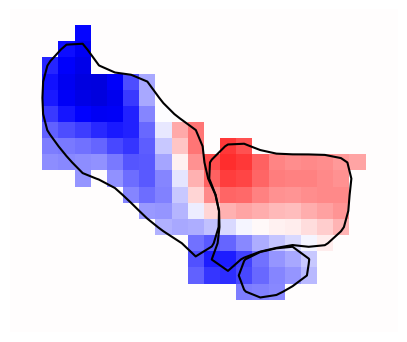

In [19]:
# insular cortex slice
ins_slice = [-36,0,0]
coord = image.coord_transform(ins_slice[0], ins_slice[1], ins_slice[2], np.linalg.inv(img.affine))
print(coord)

d = img.get_fdata()[29][56:80][:,30:50].copy()
d = np.rot90(d)

r = fear_img.get_fdata()[29][56:80][:,30:50].copy()
r = np.rot90(r)
r[d==0] = 0
r[r!=5] = 0
r[r!=0] = 1
r = scipy.ndimage.filters.gaussian_filter(r, 1, mode='constant')



r1 = fear_img.get_fdata()[29][56:80][:,30:50].copy()
r1 = np.rot90(r1)
r1[d==0] = 0
r1[r1!=6] = 0
r1[r1!=0] = 1
r1 = scipy.ndimage.filters.gaussian_filter(r1, 1, mode='constant')

r2 = fear_img.get_fdata()[29][56:80][:,30:50].copy()
r2 = np.rot90(r2)
r2[d==0] = 0
r2[r2!=7] = 0
r2[r2!=0] = 1
r2 = scipy.ndimage.filters.gaussian_filter(r2, 1, mode='constant')

fig, ax = plt.subplots()
fig.set_size_inches(fig_size)
ax.contour(r, levels=[0.5], colors='k')
ax.contour(r1, levels=[0.5], colors='k')
ax.contour(r2, levels=[0.5], colors='k')
ax.imshow(d, cmap='seismic', vmax=vmax, vmin=vmin)

plt.axis("off")

/tmp/ipykernel_342635/2680145994.py:27: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  r = scipy.ndimage.filters.gaussian_filter(r, 1, mode='constant')
/tmp/ipykernel_342635/2680145994.py:36: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  r1 = scipy.ndimage.filters.gaussian_filter(r1, 1, mode='constant')


(-0.5, 25.5, 19.5, -0.5)

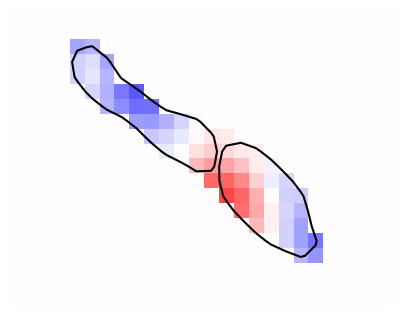

In [20]:
# hippocampus slice
# remove amygdala
tfimg = load_img(fearnet_file)
tfdata = tfimg.get_fdata().copy()
tidx = np.logical_and(tfdata!=4, tfdata!=3)
tfdata[tidx] = 0
tfdata[tfdata>0] = 1
tfear_img = nib.Nifti1Image(tfdata, tfimg.affine)
tmasker = NiftiMasker(tfear_img, standardize=False)
tv = tmasker.fit_transform(tfear_img).reshape(-1)

val = tmasker.transform(img)
timg = tmasker.inverse_transform(val)

hippo_slice = [-24,-8,-18]
image.coord_transform(hippo_slice[0], hippo_slice[1], hippo_slice[2], np.linalg.inv(img.affine))


d = timg.get_fdata()[35][42:68][:,22:42].copy()
d = np.rot90(d[...,0])

r = fear_img.get_fdata()[35][42:68][:,22:42].copy()
r = np.rot90(r)
r[d==0] = 0
r[r!=3] = 0
r[r!=0] = 1
r = scipy.ndimage.filters.gaussian_filter(r, 1, mode='constant')



r1 = fear_img.get_fdata()[35][42:68][:,22:42].copy()
r1 = np.rot90(r1)
r1[d==0] = 0
r1[r1!=4] = 0
r1[r1!=0] = 1
r1 = scipy.ndimage.filters.gaussian_filter(r1, 1, mode='constant')

fig, ax = plt.subplots()
fig.set_size_inches(fig_size)
ax.contour(r, levels=[0.5], colors='k')
ax.contour(r1, levels=[0.5], colors='k')
ax.imshow(d, cmap='seismic', vmax=vmax, vmin=vmin)
plt.axis("off")


(47.25, 78.25, 34.25)


/tmp/ipykernel_342635/2019563354.py:14: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  r = scipy.ndimage.filters.gaussian_filter(r, 1, mode='constant')
/tmp/ipykernel_342635/2019563354.py:23: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  r1 = scipy.ndimage.filters.gaussian_filter(r1, 1, mode='constant')
/tmp/ipykernel_342635/2019563354.py:30: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  r2 = scipy.ndimage.filters.gaussian_filter(r2, 1, mode='constant')


(-0.5, 34.5, 34.5, -0.5)

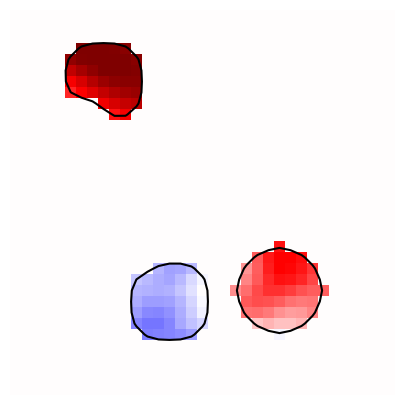

In [21]:
# prefontal cortex slice
pf_slice = [-2, 24, -10]
coord = image.coord_transform(pf_slice[0], pf_slice[1], pf_slice[2], np.linalg.inv(img.affine))
print(coord)

d = img.get_fdata()[47][65:100][:,25:60].copy()
d = np.rot90(d)

r = fear_img.get_fdata()[47][65:100][:,25:60].copy()
r = np.rot90(r)
r[d==0] = 0
r[r!=8] = 0
r[r!=0] = 1
r = scipy.ndimage.filters.gaussian_filter(r, 1, mode='constant')



r1 = fear_img.get_fdata()[47][65:100][:,25:60].copy()
r1 = np.rot90(r1)
r1[d==0] = 0
r1[r1!=9] = 0
r1[r1!=0] = 1
r1 = scipy.ndimage.filters.gaussian_filter(r1, 1, mode='constant')

r2 = fear_img.get_fdata()[47][65:100][:,25:60].copy()
r2 = np.rot90(r2)
r2[d==0] = 0
r2[r2!=10] = 0
r2[r2!=0] = 1
r2 = scipy.ndimage.filters.gaussian_filter(r2, 1, mode='constant')

fig, ax = plt.subplots()
fig.set_size_inches(fig_size)
ax.contour(r, levels=[0.5], colors='k')
ax.contour(r1, levels=[0.5], colors='k')
ax.contour(r2, levels=[0.5], colors='k')
ax.imshow(d, cmap='seismic', vmax=vmax, vmin=vmin)

plt.axis("off")